In [18]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
sales = pd.read_csv("sales.csv")
stores = pd.read_csv("stores.csv")
products = pd.read_csv("products.csv")


In [20]:
sales.info()
stores.info()
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sale_id     8 non-null      int64 
 1   store_id    8 non-null      int64 
 2   product_id  8 non-null      int64 
 3   date        8 non-null      object
 4   sales       8 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 452.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    3 non-null      int64 
 1   store_name  3 non-null      object
 2   city        3 non-null      object
 3   store_type  3 non-null      object
dtypes: int64(1), object(3)
memory usage: 228.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        ---------

In [21]:
print(sales.isnull().sum())
print(stores.isnull().sum())
print(products.isnull().sum())


sale_id       0
store_id      0
product_id    0
date          0
sales         0
dtype: int64
store_id      0
store_name    0
city          0
store_type    0
dtype: int64
product_id      0
product_name    0
category        0
price           0
dtype: int64


In [22]:
sales.drop_duplicates(inplace=True)
stores.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)


In [23]:
sales["date"] = pd.to_datetime(sales["date"])
sales["sales"] = sales["sales"].astype(float)
products["price"] = products["price"].astype(float)


In [24]:
stores["store_name"] = stores["store_name"].str.title()
stores["city"] = stores["city"].str.title()
products["category"] = products["category"].str.title()


In [25]:
df = sales.merge(stores, on="store_id", how="left")
df = df.merge(products, on="product_id", how="left")


In [26]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["weekday"] = df["date"].dt.day_name()


In [27]:
avg_sales_store = df.groupby("store_name")["sales"].mean()
avg_sales_product = df.groupby("product_name")["sales"].mean()


In [28]:
df.describe()


,sale_id,store_id,product_id,date,sales,price,year,month
count,8.00000,8.000000,8.000000,8,8.000000,8.00000,8.0,8.0
mean,4.50000,101.875000,502.375000,2023-01-04 12:00:00,1143.750000,178.75000,2023.0,1.0
min,1.00000,101.000000,501.000000,2023-01-01 00:00:00,800.000000,120.00000,2023.0,1.0
25%,2.75000,101.000000,501.750000,2023-01-02 18:00:00,937.500000,142.50000,2023.0,1.0
50%,4.50000,102.000000,502.000000,2023-01-04 12:00:00,1150.000000,150.00000,2023.0,1.0
75%,6.25000,102.250000,503.250000,2023-01-06 06:00:00,1325.000000,220.00000,2023.0,1.0
max,8.00000,103.000000,504.000000,2023-01-08 00:00:00,1500.000000,300.00000,2023.0,1.0
std,2.44949,0.834523,1.187735,NaN,249.910698,62.66407,0.0,0.0


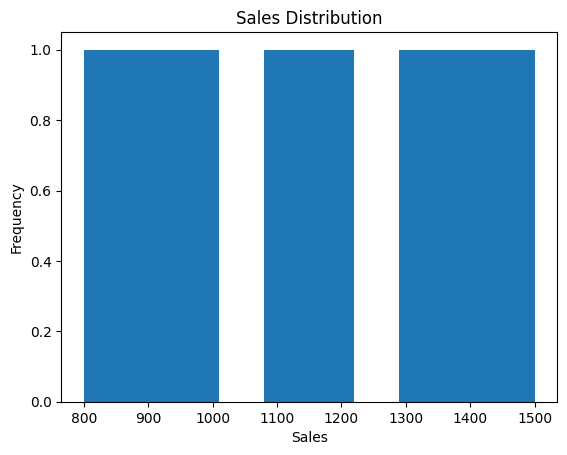

In [29]:
plt.figure()
df["sales"].plot(kind="hist")
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


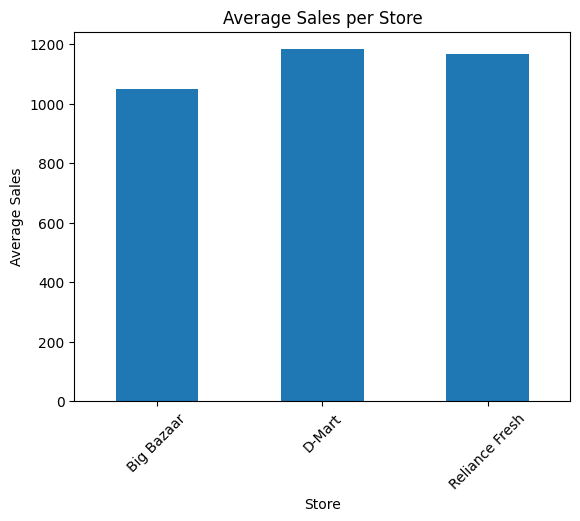

In [30]:
plt.figure()
avg_sales_store.plot(kind="bar")
plt.title("Average Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()


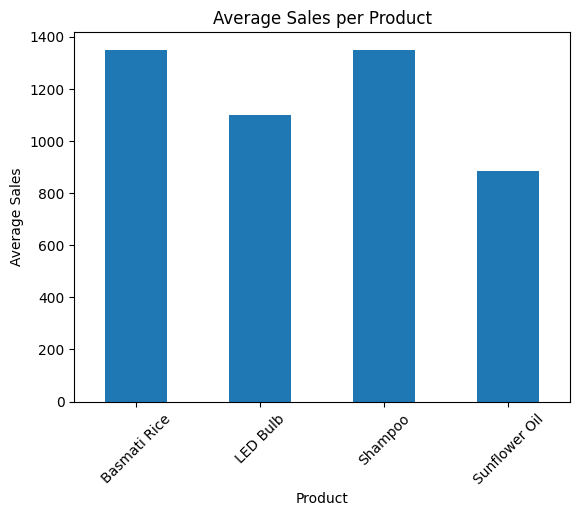

In [31]:
plt.figure()
avg_sales_product.plot(kind="bar")
plt.title("Average Sales per Product")
plt.xlabel("Product")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.show()


In [32]:
df[["sales", "price"]].corr()


,sales,price
sales,1.000000,0.090652
price,0.090652,1.000000


In [33]:
df.to_csv("cleaned_retail_data.csv", index=False)


In [34]:
print(df.head())
print("Cleaned file saved successfully")


   sale_id  store_id  product_id       date   sales      store_name  \
0        1       101         501 2023-01-01  1200.0  Reliance Fresh   
1        2       101         502 2023-01-02   900.0  Reliance Fresh   
2        3       102         501 2023-01-03  1500.0          D-Mart   
3        4       102         503 2023-01-04  1100.0          D-Mart   
4        5       103         504 2023-01-05  1300.0      Big Bazaar   

        city   store_type   product_name       category  price  year  month  \
0     Mumbai  Supermarket   Basmati Rice        Grocery  120.0  2023      1   
1     Mumbai  Supermarket  Sunflower Oil        Grocery  150.0  2023      1   
2       Pune  Hypermarket   Basmati Rice        Grocery  120.0  2023      1   
3       Pune  Hypermarket       LED Bulb    Electronics  300.0  2023      1   
4  Bangalore  Supermarket        Shampoo  Personal Care  220.0  2023      1   

     weekday  
0     Sunday  
1     Monday  
2    Tuesday  
3  Wednesday  
4   Thursday  
Cleaned 